<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/HZZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.5/352.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.5/812.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.5/692.5 kB 32.3 MB/s eta 0:00:00


In [3]:
import uproot

# We will load ROOT datasets in python using uproot

In [4]:
%%bash
mkdir -p data
wget -O data/ntuple_4mu_bkg.root "https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1"
wget -O data/ntuple_4mu_VV.root "https://zenodo.org/record/3901869/files/ntuple_4mu_VV.root?download=1"

--2024-07-12 07:40:39--  https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3901869/files/ntuple_4mu_bkg.root [following]
--2024-07-12 07:40:40--  https://zenodo.org/records/3901869/files/ntuple_4mu_bkg.root
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 8867265 (8.5M) [application/octet-stream]
Saving to: ‘data/ntuple_4mu_bkg.root’

     0K .......... .......... .......... .......... ..........  0%  186K 46s
    50K .......... .......... .......... .......... ..........  1%  418K 33s
   100K .......... .......... .......... .......... ..........  1%  418K 29s
   150K .......... .......... .......... .......... ..........  2%  109M 22s
   200K .......... .......... .......

In [5]:
import numpy as np
import h5py

treename = "HZZ4LeptonsAnalysisReduced"
filename = {}
upfile = {}

filename["bkg"] = "data/ntuple_4mu_bkg.root"
filename["VV"] = "data/ntuple_4mu_VV.root"

upfile["bkg"] = uproot.open(filename["bkg"])
upfile["VV"] = uproot.open(filename["VV"])

print(upfile["bkg"][treename].show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
f_run                | int32_t                  | AsDtype('>i4')
f_lumi               | int32_t                  | AsDtype('>i4')
f_event              | int32_t                  | AsDtype('>i4')
f_weight             | float                    | AsDtype('>f4')
f_int_weight         | float                    | AsDtype('>f4')
f_pu_weight          | float                    | AsDtype('>f4')
f_eff_weight         | float                    | AsDtype('>f4')
f_lept1_pt           | float                    | AsDtype('>f4')
f_lept1_eta          | float                    | AsDtype('>f4')
f_lept1_phi          | float                    | AsDtype('>f4')
f_lept1_charge       | float                    | AsDtype('>f4')
f_lept1_pfx          | float                    | AsDtype('>f4')
f_lept1_sip          | float                    | AsDtype(

In [19]:
import pandas as pd

VARS = ["f_mass4l", "f_massjj"]  # choose which vars to use (2d)

df = {}
df["bkg"] = upfile["bkg"][treename].arrays(VARS, library="pd")
df["VV"] = upfile["VV"][treename].arrays(VARS, library="pd")

# print first entry
print(df["bkg"].iloc[:1])

    f_mass4l  f_massjj
0  91.098129    -999.0


In [20]:
# print shape of DataFrame
print(df["bkg"].shape)

(58107, 2)


In [10]:
# print first entry for f_mass4l and f_massjj
print(df["bkg"][branches].iloc[:1])

    f_mass4l  f_massjj
0  91.098129    -999.0


In [11]:
# convert back into unstructured NumPY array
print(df["bkg"].values)
print(df["bkg"].values.shape)


[[  91.09813  -999.      ]
 [ 201.84761  -999.      ]
 [  89.279076 -999.      ]
 ...
 [  90.129845 -999.      ]
 [ 250.97742  -999.      ]
 [ 229.47015  -999.      ]]
(58107, 2)


In [13]:
# get boolean mask array
mask = df["bkg"]["f_mass4l"] > 125
print(mask)


0        False
1         True
2        False
3         True
4         True
         ...  
58102    False
58103     True
58104    False
58105     True
58106     True
Name: f_mass4l, Length: 58107, dtype: bool


In [14]:
# cut using this boolean mask array
print(df["bkg"]["f_mass4l"][mask])

1        201.847610
3        586.597412
4        135.589798
5        734.903442
6        341.958466
            ...    
58097    225.355103
58098    214.074249
58103    252.845184
58105    250.977417
58106    229.470154
Name: f_mass4l, Length: 42219, dtype: float32


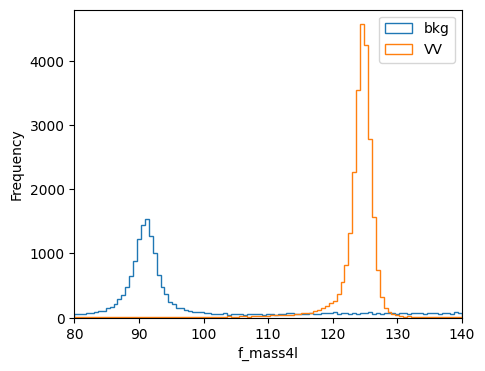

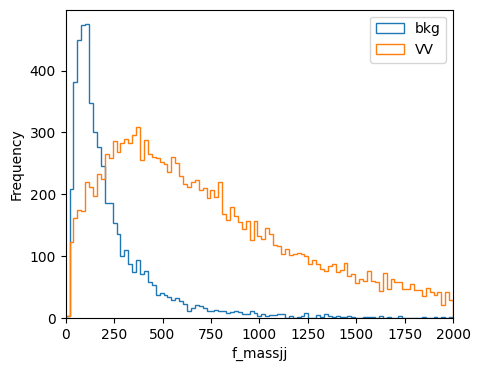

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

#VARS = ["f_mass4l", "f_massjj"]

plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(80, 140, 100)
df["bkg"][VARS[0]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[0]].plot.hist(bins=bins, alpha=1, label="VV", histtype="step")
plt.legend(loc="upper right")
plt.xlim(80, 140)
plt.xlabel(VARS[0])
plt.show()

plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(0, 2000, 100)
df["bkg"][VARS[1]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[1]].plot.hist(bins=bins, alpha=1, label="VV", histtype="step")
plt.legend(loc="upper right")
plt.xlim(0, 2000)
plt.xlabel(VARS[1])
plt.show()

In [16]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [22]:
# cut out undefined variables VARS[0] and VARS[1] > -999
df["VV"] = df["VV"][(df["VV"][VARS[0]] > -999) & (df["VV"][VARS[1]] > -999)]
df["bkg"] = df["bkg"][(df["bkg"][VARS[0]] > -999) & (df["bkg"][VARS[1]] > -999)]

# add isSignal variable
df["VV"]["isSignal"] = np.ones(len(df["VV"]))
df["bkg"]["isSignal"] = np.zeros(len(df["bkg"]))

In [23]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")
outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(inputs)

# create the model
model = Model(inputs=inputs, outputs=outputs)
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
df_all = pd.concat([df["VV"], df["bkg"]])
dataset = df_all.values
X = dataset[:, 0:NDIM]
Y = dataset[:, NDIM]

from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_val)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [25]:
# Train classifier
history = model.fit(
    X_train_val,
    Y_train_val,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
13/13 [==============================] - 2s 39ms/step - loss: 0.7025 - accuracy: 0.0897 - val_loss: 0.6973 - val_accuracy: 0.5610
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.7316 - val_loss: 0.6884 - val_accuracy: 0.7770
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6886 - accuracy: 0.7920

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 13ms/step - loss: 0.6846 - accuracy: 0.7615 - val_loss: 0.6797 - val_accuracy: 0.7580
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.7611 - val_loss: 0.6712 - val_accuracy: 0.7871
Epoch 5/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.6675 - accuracy: 0.8196 - val_loss: 0.6630 - val_accuracy: 0.8464
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6594 - accuracy: 0.8650 - val_loss: 0.6548 - val_accuracy: 0.8754
Epoch 7/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.6513 - accuracy: 0.8852 - val_loss: 0.6470 - val_accuracy: 0.8877
Epoch 8/1000
13/13 [==============================] - 0s 30ms/step - loss: 0.6435 - accuracy: 0.8964 - val_loss: 0.6393 - val_accuracy: 0.8954
Epoch 9/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.6358 - accuracy: 0.9039 - val_loss: 0.6318 - val_accuracy: 0.9028
Epoch 10/100

130/130 [==============================] - 0s 1ms/step


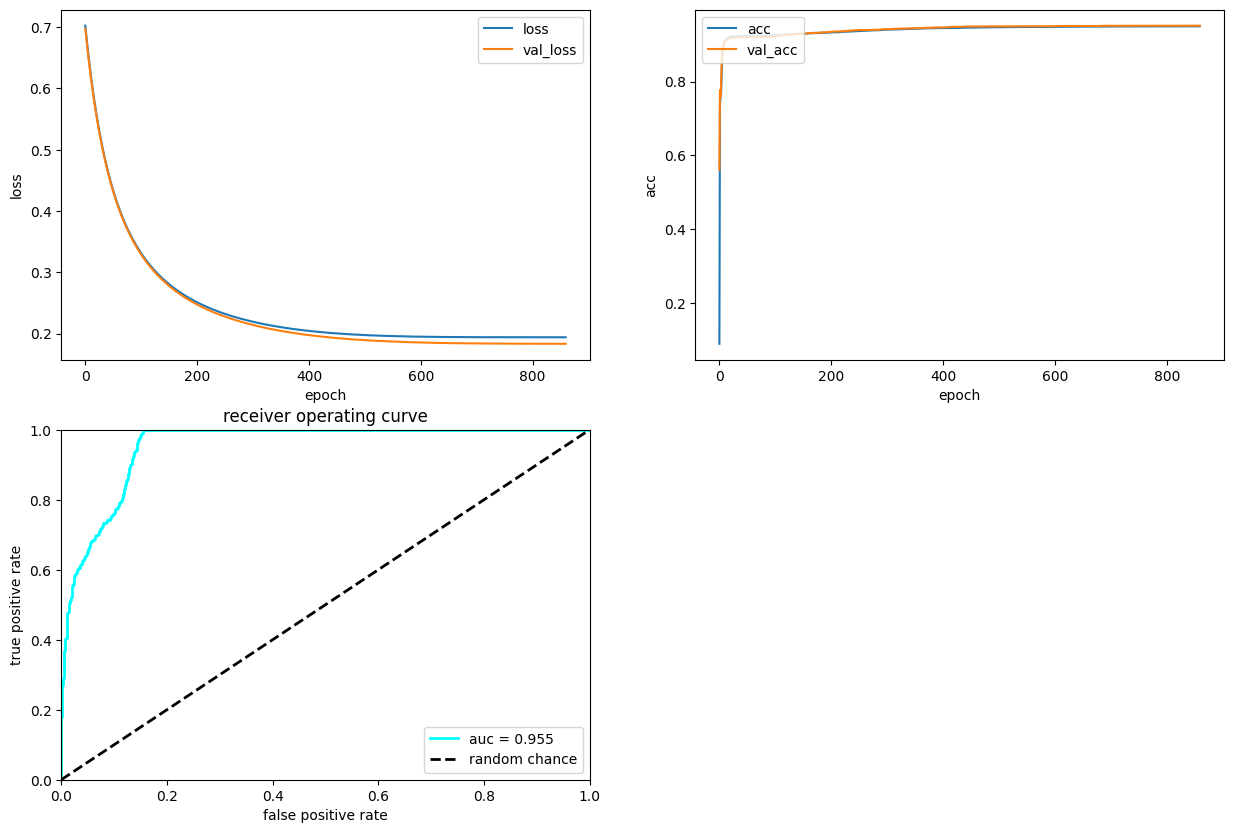

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [28]:
df_all["dense"] = model.predict(X)  # add prediction to array
print(df_all.iloc[:20])

649/649 [==============================] - 1s 2ms/step
      f_mass4l     f_massjj  isSignal  dense
0   125.077103  1300.426880       1.0    1.0
1   124.238113   437.221863       1.0    1.0
3   124.480667  1021.744080       1.0    1.0
4   124.919464  1101.381958       1.0    1.0
7   125.049065   498.717194       1.0    1.0
8   124.130005   481.052643       1.0    1.0
10  121.229126   689.339294       1.0    1.0
11  125.027206  2405.221191       1.0    1.0
13  122.473053   530.915222       1.0    1.0
14  123.048691  5575.506836       1.0    1.0
15  124.495239   239.260925       1.0    1.0
21  124.740082  2092.268311       1.0    1.0
23  124.471817   970.399841       1.0    1.0
24  119.681374   234.038818       1.0    1.0
27  126.484306   127.600357       1.0    0.0
31  125.878250   745.095764       1.0    1.0
32  123.532280   626.617432       1.0    1.0
35  125.434090   646.003906       1.0    1.0
36  124.052811  1582.876587       1.0    1.0
37  124.712631   338.278992       1.0    1.0


In [29]:
# make a regular 2D grid for the inputs
myXI, myYI = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))
# print shape
print(myXI.shape)

# run prediction at each point
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

(200, 200)
1250/1250 [==============================] - 2s 2ms/step


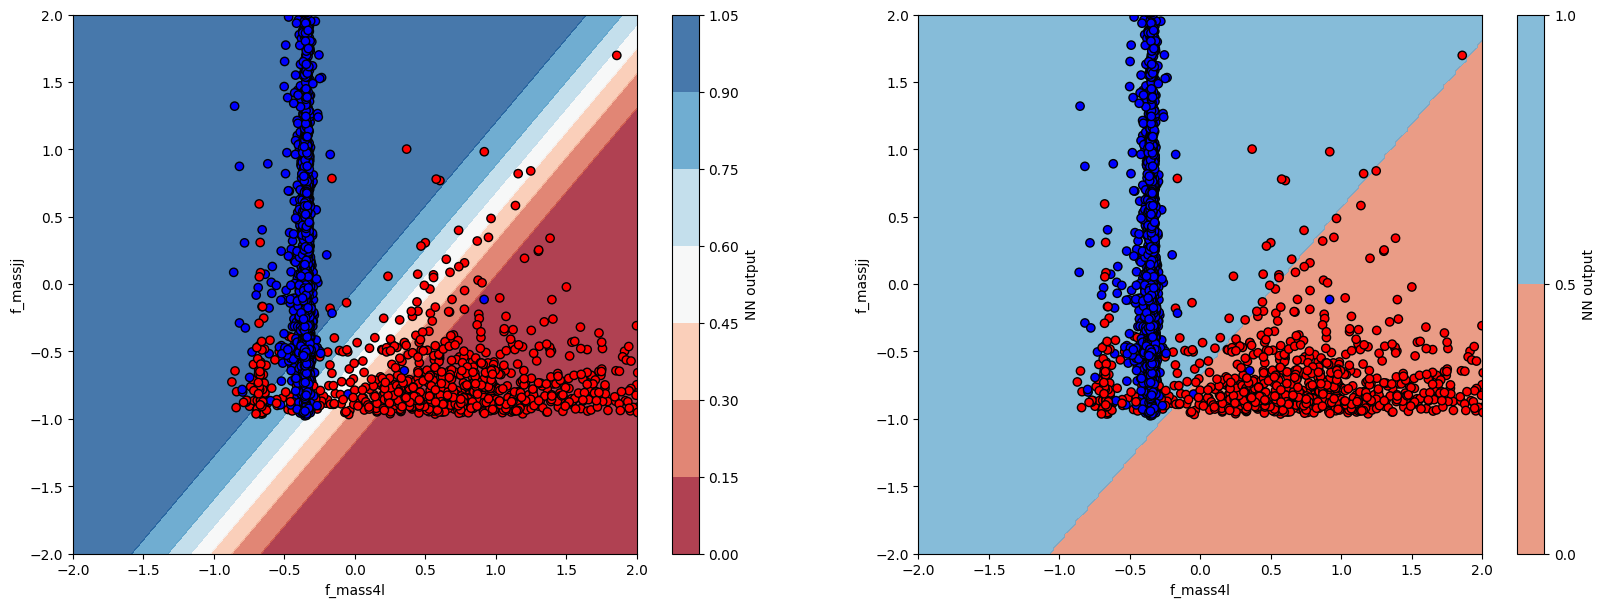

In [30]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(20, 7))

# plot contour map of NN output
# overlaid with test data points
ax = plt.subplot(1, 2, 1)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cont_plot = ax.contourf(myXI, myYI, myZI, cmap=cm, alpha=0.8)
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors="k")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
plt.colorbar(cont_plot, ax=ax, boundaries=[0, 1], label="NN output")

# plot decision boundary
# overlaid with test data points
ax = plt.subplot(1, 2, 2)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cont_plot = ax.contourf(myXI, myYI, myZI > 0.5, cmap=cm, alpha=0.8)
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors="k")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
plt.colorbar(cont_plot, ax=ax, boundaries=[0, 1], label="NN output")
plt.show()